# Molecule analysis and visualization

This notebook shows the definition of some functions related to reading, analyzing, and visualizing an coordinates from a molecular XYZ or pdb file.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

def calculate_distance(rA, rB):
    d=(rA-rB)
    dist=np.linalg.norm(d)
    return dist

def open_pdb(f_loc):
    with open(f_loc) as f:
        data = f.readlines()
    c = []
    sym = []
    for l in data:
        if 'ATOM' in l[0:6] or 'HETATM' in l[0:6]:
            sym.append(l[76:79].strip())
            c2 = [float(x) for x in l[30:55].split()]
            c.append(c2)
    coords = np.array(c)
    return sym, coords

atomic_weights = {
    'H': 1.00784,
    'C': 12.0107,
    'N': 14.0067,
    'O': 15.999,
    'P': 30.973762,
    'F': 18.998403,
    'Cl': 35.453,
    'Br': 79.904,
}


def open_xyz(file_location):
    
    # Open an xyz file and return symbols and coordinates.
    xyz_file = np.genfromtxt(fname=file_location, skip_header=2, dtype='unicode')
    symbols = xyz_file[:,0]
    coords = (xyz_file[:,1:])
    coords = coords.astype(np.float)
    return symbols, coords

def write_xyz(file_location, symbols, coordinates):
    
    num_atoms = len(symbols)
    
    with open(file_location, 'w+') as f:
        f.write('{}\n'.format(num_atoms))
        f.write('XYZ file\n')
        
        for i in range(num_atoms):
            f.write('{}\t{}\t{}\t{}\n'.format(symbols[i], 
                                              coordinates[i,0], coordinates[i,1], coordinates[i,2]))

def draw_molecule(coordinates, symbols, draw_bonds=None, save_location=None, dpi=300):
    
    # Create figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Get colors - based on atom name
    colors = []
    for atom in symbols:
        colors.append(atom_colors[atom])
    
    size = np.array(plt.rcParams['lines.markersize'] ** 2)*200/(len(coordinates))

    ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], marker="o",
               edgecolors='k', facecolors=colors, alpha=1, s=size)
    
    # Draw bonds
    if draw_bonds:
        for atoms, bond_length in draw_bonds.items():
            atom1 = atoms[0]
            atom2 = atoms[1]
            
            ax.plot(coordinates[[atom1,atom2], 0], coordinates[[atom1,atom2], 1],
                    coordinates[[atom1,atom2], 2], color='k')
            
    plt.axis('square')
    
    # Save figure
    if save_location:
        plt.savefig(save_location, dpi=dpi, graph_min=0, graph_max=2)
    
    return ax

def calculate_angle(rA, rB, rC, degrees=False):
    AB = rB - rA
    BC = rB - rC
    theta=np.arccos(np.dot(AB, BC)/(np.linalg.norm(AB)*np.linalg.norm(BC)))

    if degrees:
        return np.degrees(theta)
    else:
        return theta

def bond_histogram(bond_list, save_location=None, dpi=300, graph_min=0, graph_max=2):
    
    lengths = []
    for atoms, bond_length in bond_list.items():
        lengths.append(bond_length)
    
    bins = np.linspace(graph_min, graph_max)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.xlabel('Bond Length (angstrom)')
    plt.ylabel('Number of Bonds')
    
    
    ax.hist(lengths, bins=bins)
    
    # Save figure
    if save_location:
        plt.savefig(save_location, dpi=dpi)
    
    return ax
        
def build_bond_list(coordinates, max_bond=1.5, min_bond=0):
    
    # Find the bonds in a molecule
    bonds = {}
    num_atoms = len(coordinates)

    for atom1 in range(num_atoms):
        for atom2 in range(atom1, num_atoms):
            distance = calculate_distance(coordinates[atom1], coordinates[atom2])
            if distance > min_bond and distance < max_bond:
                bonds[(atom1, atom2)] = distance

    return bonds

atom_colors = {
    'H': 'white',
    'C': '#D3D3D3',
    'N': '#add8e6',
    'O': 'red',
    'P': '#FFA500',
    'F': '#FFFFE0',
    'Cl': '#98FB98',
    'Br': '#F4A460',
    'S': 'yellow'
}



In [4]:
benzene_file_path = os.path.join('data', 'xyz', 'benzene.xyz')
benzene_symbols, benzene_coords = open_xyz(benzene_file_path)
benzene_bonds = build_bond_list(benzene_coords, max_bond=1.7)

In [5]:
benzene_bonds

{(0, 1): 1.08757,
 (0, 2): 1.402719000263417,
 (0, 10): 1.402719000263417,
 (2, 3): 1.087578347062868,
 (2, 4): 1.40272,
 (4, 5): 1.087578347062868,
 (4, 6): 1.402719000263417,
 (6, 7): 1.08757,
 (6, 8): 1.402719000263417,
 (8, 9): 1.087578347062868,
 (8, 10): 1.40272,
 (10, 11): 1.087578347062868}

In [6]:
avg_sum = 0

for atoms, bl in benzene_bonds.items():
    avg_sum += bl

avg_bl = avg_sum/len(benzene_bonds)

print('The average bond length is {}'.format(avg_bl))

The average bond length is 1.2451474491087617


<IPython.core.display.Javascript object>


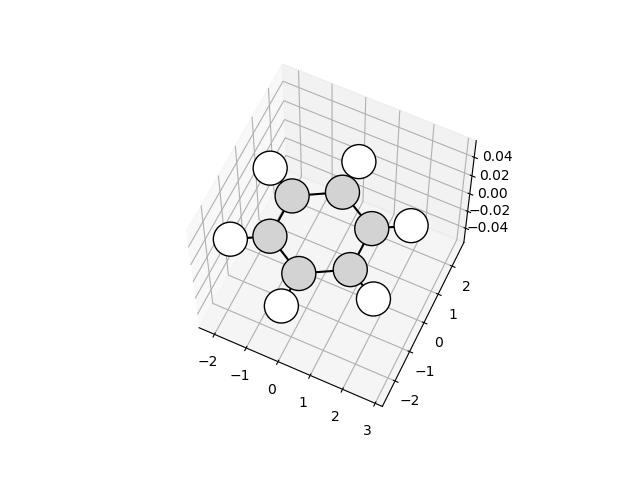

In [7]:
%matplotlib notebook
benzene_fig = draw_molecule(benzene_coords, benzene_symbols, draw_bonds=benzene_bonds)

In [8]:
plt.savefig('benzene.png', dpi=300)

<IPython.core.display.Javascript object>


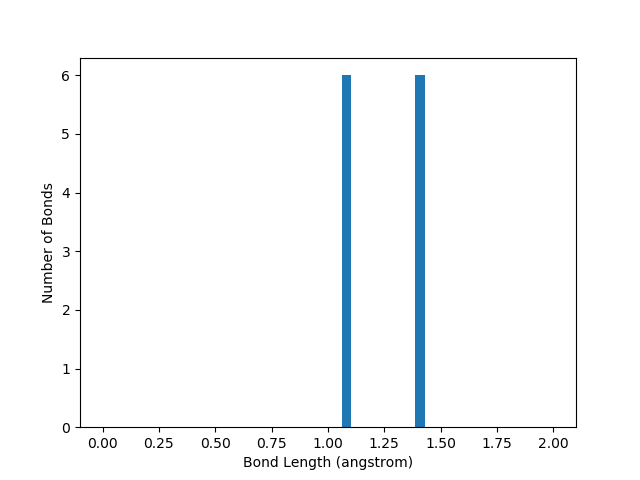

In [9]:
bond_histogram(benzene_bonds, save_location="benzene_histogram.png")